In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


### 전처리코드는 대부분 Kaggle 확인하고 높은 점수 또는 좋은 인사이트를 주는 마스터들의 코드를 확인하고 공유
### 다 이해하는 것 보다는 코드를 작성한 사람의 접근방법, 로직 등을 여러분들이 한 번쯤은 이해하고 알아두면 좋다!
### 이 코드를 작성하면서 이 사람이 얻고자 하는 것
### 이 코드의 공통적인 접근 방법!

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1) #axis=1 로 열 지정
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df] # 두 데이터프레임을 하나의 리스트로 묶어 한 번에 조작

In [6]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

### 데이터 전처리 진행시
- 공통적으로는 모든 문자열 데이터 등이 다 수치화 되어야 한다.
### 데이터 타입에 따라 전처리 방식 다르다!
- 문자형 데이터 : 우리가 알고 있는 문자라는 뜻을 -> 인코딩하여 수치로 바꿔야 한다.
- 숫자형 데이터 : 연속(연속적인 숫자), 이산 (0,1,2)
- 연속적인 숫자를 range로 만들어서 전처리 하는 경우

### 전처리하면서 공통점은?
- 타겟값 y값 기준으로 데이터의 분포를 봐야한다!

In [7]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### Name 전처리 방법!

In [8]:
for df in combine:
    df['Name_re'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
    #([A-Za-z]+)\.는 알파벳 문자로 이루어진 단어를 추출하되, 그 뒤에 마침표가 있어야 한다는 의미
    # expand=False는 추출된 결과를 데이터프레임이 아닌 시리즈(Series)로 반환하도록 지정합니다.
    # 시리즈는 pandas에서 제공하는 데이터구조 중 하나로 1차원 배열 형태의 데이터를 저장하는 객체
    
    #정규표현식 문자열 전처리할 때 내가 원하는 문자만 추출
    # 패턴을 새롭게 만들거나, 패턴을 찾거나, 빈도를 분석하거나 할 때 많이 사용
    # 문자열, 텍스트 분석시 필수로 많이 사용한다!

In [9]:
#전처리한 값을 pd.crosstab으로 확인하기

pd.crosstab(train_df['Name_re'], train_df['Sex'])
#뒤에 있는 것이 열, 앞이 행
#두 변수 사이의 관계를 보기 위한 교차표 출력

Sex,female,male
Name_re,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### 데이터의 정보가 1개씩 매핑되는 것들이 너무 많다보면 학습할 때 정답을 예측하기에 오히려 더 문제가 된다.
- 다양한 정보들이 많아지게 되면서 그룹핑을 통해 데이터 전처리 등을 많이 한다.

In [10]:
for df in combine:
    df['Name_re'] = df['Name_re'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare') #확실하게 정보를 분류할 수 있는 값들은 제외하고 나머지들 작은 값들은 다 하나로 묶는다.


    df['Name_re'] = df['Name_re'].replace('Mlle','Miss') # 확실한 친구들은 남여 값으로 대체 한다MISS, MRS
    df['Name_re'] = df['Name_re'].replace('Ms','Miss')
    df['Name_re'] = df['Name_re'].replace('Mme','Mrs')

train_df[['Name_re','Survived']].groupby(['Name_re'],as_index=False).mean() 
#만든 전처리 코드를 생존 같이 묶어서 확인한다
#as_index=False는 그룹화된 결과를 새로운 인덱스로 만들지 않고 데이터프레임의 기존 인덱스를 유지하도록 지정

,Name_re,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### 내가 사용할 값들을 -> 인코딩으로 바꾸기! 수치로 바꿔줘야 한다!

In [ ]:
name_re = {'Mr':1, 'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for df in combine:
    df['Name_re'] = df['Name_re'].map(name_re) # 위에 적은 딕셔너리의 키에 맞는 값들을 값으로 바꾼다.
    df['Name_re'] = df['Name_re'].fillna(0) #na값 없는 값은 0으로 대체한다

# map() 함수는 보통 map(function, iterable) 형식을 가지며, 
#첫 번째 인자로는 함수를, 두 번째 인자로는 반복 가능한(iterable) 객체를 받는다.
#그러나 Pandas의 Series나 DataFrame 객체에서 map() 메서드를 사용할 때는 약간 다른 방식으로 사용된다.
#Pandas에서의 map() 메서드는 시리즈(Series)나 데이터프레임(DataFrame)의 열에 적용되며, 
#해당 열의 각 요소에 함수를 적용하여 변환하는 역할을 한다
#이 때, 첫 번째 인자로는 변환할 값들에 적용할 함수나 매핑 사전을 받는다.
#따라서 이 코드에서 df['Name_re'].map(name_re)는 'Name_re' 열의 각 요소를 'name_re' 사전에 매핑하여 해당하는 값을 반환하게 됩니다. 
#이는 Pandas의 map() 메서드가 원래의 파이썬 내장 map() 함수와는 다소 다른 용도로 사용되고 있음을 나타냅니다.

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


### 남성 여성 매핑

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [ ]:
for df in combine:
    df['Sex'] = df['Sex'].map({'female':1,'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [ ]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Name_re       0
dtype: int64

### age 값이 Nan 값이 만다

- Age 컬럼의 전체 분포나, 빈도나 이런 통계적인 수치를 가지고 결측값을 대체한다!
- Age -> 다른 컬럼들과 관계를 보고 -> 그컬럼들의 특성을 가지고 Age 얘를 대체한다
- pclass 성별이랑 두 개를 확인해서 -> Age 분포가 되어있는지 보고 해당 분포를 가지고 Age의 값을 대체하게 된다.

- Age를 대체하기 위해서 pclass, sex 고른 근기가 필요하다.
- 컬럼들간의 관계 ( 수치적인 것들 ), 도메인 지식은 필수적으로 생각해야 한다.

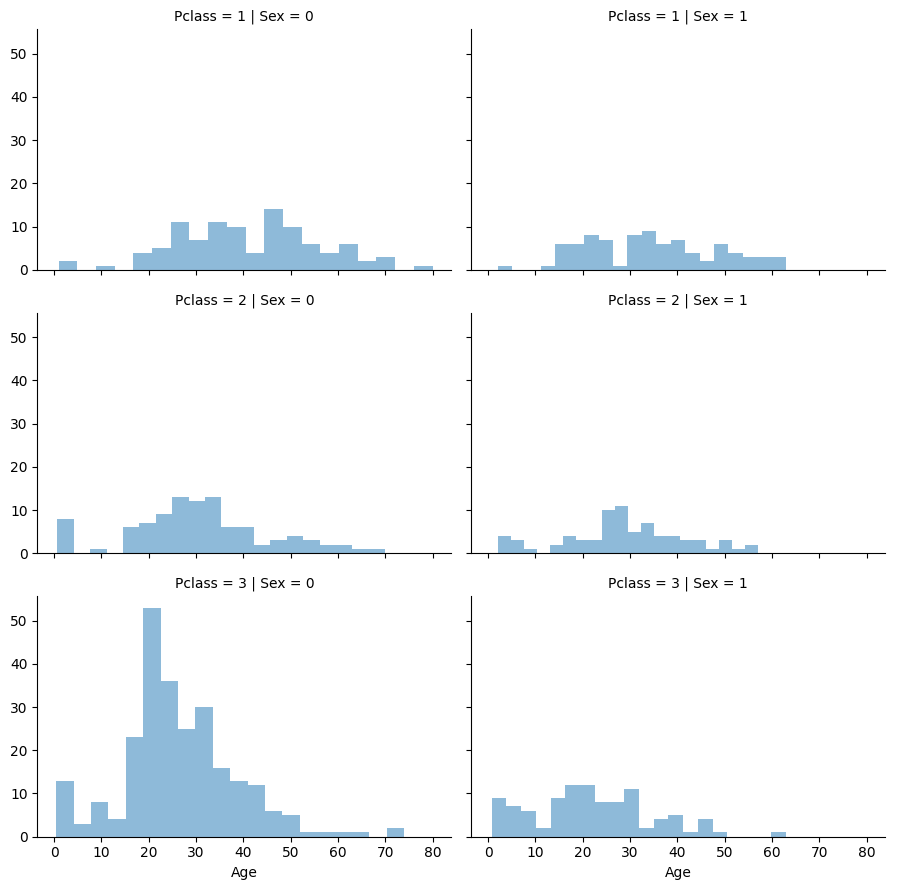

In [ ]:
grid = sns.FacetGrid(train_df , row='Pclass', col='Sex', aspect= 1.5)
grid.map(plt.hist , 'Age', alpha=.5, bins=20)
grid.add_legend()

- 나이라는 것도 1살~ 80살,100살
- 이 나이가 또 1:1 대응이 많아지면 복잡해진다.
- 학습을 위해서 범주화하여 나이 자체도 5세그룹 10세 그룹 이런식으로 그룹바이를 진행한다.

In [ ]:
# age에 대한 guess 하기 위한 배열 하나 만들기
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
for df in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = df[(df['Sex']==i) & (df['Pclass']== j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            guess_ages[i,j]= int(age_guess/0.5 + 0.5) * 0.5 #나이에 대한 범주화 기준을 미디안으로 잡고 수식을 만들어서 넣었다.



    for i in range(0,2):
        for j in range(0,3):
            df.loc[(df.Age.isnull())& (df.Sex == i)& (df.Pclass == j+1), 'Age'] = guess_ages[i,j]


    df['Age'] = df['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


### 나이에 대해서 범주화한 값을 살펴보자!

In [ ]:
train_df['Agerange'] = pd.cut(train_df['Age'],5)
#pd.cut() 함수는 연속적인 값을 지정된 구간(bin)으로 나누는 역할
#여기서는 'Age' 열의 값을 5개의 구간으로 나눕니다

In [ ]:
train_df[['Agerange','Survived']].groupby(['Agerange'], as_index=False).mean().sort_values(by='Agerange', ascending=True)

,Agerange,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [ ]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Name_re     0
Agerange    0
dtype: int64

- age 미싱값이 다사라지고 전처리한 코드!

### age -> 인코딩 진행

In [ ]:
for df in combine:
    df.loc[df['Age'] <= 16, 'Age']=0
    df.loc[(df['Age'] > 16) & (df['Age'] <=32), 'Age']=1
    df.loc[(df['Age'] > 32) & (df['Age'] <=48), 'Age']=2
    df.loc[(df['Age'] > 48) & (df['Age'] <=64), 'Age']=3
    df.loc[df['Age'] > 64, 'Age']
train_df.head()

#df.loc(행 이름, 열 이름)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re,Agerange
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [ ]:
train_df.Age.value_counts()

Age
1     495
2     216
0     100
3      69
65      3
70      3
71      2
66      1
80      1
74      1
Name: count, dtype: int64

In [ ]:
train_df = train_df.drop(['Agerange'],axis=1)

In [ ]:
combine = [train_df, test_df]

In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5
887,1,1,1,1,0,0,30.0000,S,2
888,0,3,1,1,1,2,23.4500,S,2
889,1,1,0,1,0,0,30.0000,C,1


### 전처리를 하지 않은 것과 전처리 한 코드를 비교해서 실제 정확도를 보면
### 전처리한 정확도가 더 높게 나온다!
### 전처리를 하지 않게 되면 사용할 수 있는 컬럼도 줄어들 게 된다.
- 다른 데이터를 분석하실 때도 컬럼이 너무 적게 되면 학습할 때 문제가 될 수 있다.
- 전처리를 통해서 필요한 컬럼들을 선별하는 과정

### 복습과제라도 정말 꼭 필수적으로 잘 해주세요!
### 복습과제를 위의 타이타닉데이터 직접 다 인코딩 해보시고 어떤 식으로 바뀌는지 꼭 잘 복습해주세요!

- 다음시간 타이타닉데이터 마무리까지 진행하고 그다음 통계분석들 넘어갈 예정!!231125